Confusion Matrix:
[[35  0]
 [ 1 37]]
--------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.97      0.99        38

    accuracy                           0.99        73
   macro avg       0.99      0.99      0.99        73
weighted avg       0.99      0.99      0.99        73

--------------------------------------------------------------------------
Coefficient:  [array([[ 4.79873086e-01, -8.47539883e-01,  1.34486932e+00],
       [ 3.08981827e-01, -3.60204791e-01, -7.68671814e-01],
       [-4.57125122e-05, -1.48302486e-04, -1.56875026e-04],
       [ 1.88447921e+00, -2.03056008e+00, -8.66999149e-01],
       [ 2.58240291e-01, -3.68445189e-01,  1.07183967e+00],
       [-8.87574260e-01,  1.13986305e+00,  5.90327641e-01],
       [-2.25442844e+00,  2.12158641e+00,  1.82922542e+00],
       [-7.73446782e+00,  7

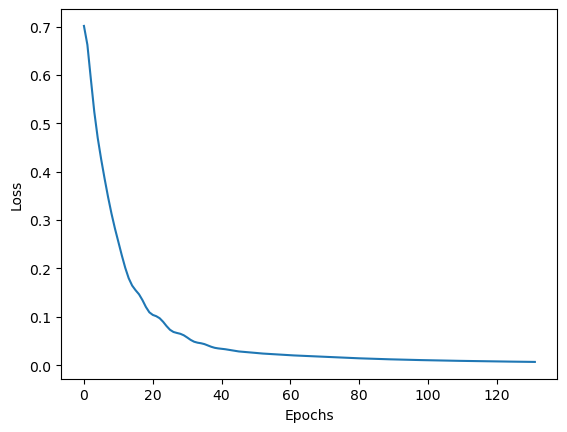

In [91]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

df=pd.read_csv("Forest_Fire_Dataset.csv")
#print(df)
#le=LabelEncoder()
df['Fire'], unique_values = pd.factorize(df['Classes'])
#df['Classes']=le.fit_transform(df['Classes'])
#df['Classes']=df['Classes'].replace('fire','1')
inplist=df.columns[:-3]
scale=StandardScaler()
df[inplist]=scale.fit_transform(df[inplist])
#print(df.tail(10))
"""
y=df.values[:,-1]
for i in range(len(y)):
    print(str(i+2)+" "+str(y[i]))
"""
x=df.iloc[:,:-3].values
y=df['Fire'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=11)
clf=MLPClassifier(hidden_layer_sizes=(3,),activation='logistic',max_iter=150,solver='adam',learning_rate='constant',learning_rate_init=0.19)
clf.fit(x_train,y_train)
ypred = clf.predict(x_test)
cm = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(cm)
print("--------------------------------------------------------------------------")
print('Classification Report:\n',classification_report(y_test,ypred))
print("--------------------------------------------------------------------------")
print('Coefficient: ',clf.coefs_)
print("--------------------------------------------------------------------------")
print("Intercepts: ",clf.intercepts_)
print("--------------------------------------------------------------------------")
loss_values=clf.loss_curve_
plt.plot(loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()




